**IMPORTING NECCESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING DATASET**

In [2]:
data =pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Alamin/my_data.csv')

**DISPLAY SOME DATA RECORDS**

In [3]:
#Display Last five Record from the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
#Display Last five Record from the dataset
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
395,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
396,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
397,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
398,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
399,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
#Display  Dataset Shape
print ("Numbers of rows", data.shape[0])
print ("Numbers of rows", data.shape[1])

Numbers of rows 400
Numbers of rows 8


In [6]:
#Display  Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            400 non-null    int64  
 1   P            400 non-null    int64  
 2   K            400 non-null    int64  
 3   temperature  400 non-null    float64
 4   humidity     400 non-null    float64
 5   ph           400 non-null    float64
 6   rainfall     400 non-null    float64
 7   label        400 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.1+ KB


In [7]:
#Check if null Values exist from the Dataset
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [8]:
#Display Result of Statistical Computation
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,75.825000,43.81500,37.612500,26.004125,79.086266,6.294059,168.640259
std,34.342728,25.84445,8.774955,2.220583,13.428227,0.586439,53.886789
min,0.000000,5.00000,25.000000,20.045414,50.045570,5.005307,90.109781
25%,55.000000,24.00000,30.000000,24.807306,73.760968,5.853459,119.185020
50%,87.000000,38.00000,35.000000,26.289425,81.621913,6.206005,165.302717
75%,101.000000,62.50000,45.000000,27.561769,86.238206,6.735242,203.183745
max,120.000000,95.00000,55.000000,29.908885,99.981876,7.868475,298.560117


In [9]:
#Data Preprocessing Continue
data_copy = data.copy(deep=True)

In [10]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
data_copy[['N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall']] = data_copy[['N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall']].replace(0,np.nan)

In [12]:
data['N'] = data['N'].replace(0,data['K'].mean())
data['P']=data['P'].replace(0,data['P'].mean())
data['K']=data['K'].replace(0,data['K'].mean())
data['temperature']=data['temperature'].replace(0,data['temperature'].mean())
data['humidity']=data['humidity'].replace(0,data['humidity'].mean())
data['ph']=data['ph'].replace(0,data['ph'].mean())
data['rainfall']=data['rainfall'].replace(0,data['rainfall'].mean())

**DISPLAY RECORD AFTER DATA PREPROCESSING**

Text(0, 0.5, 'frequency')

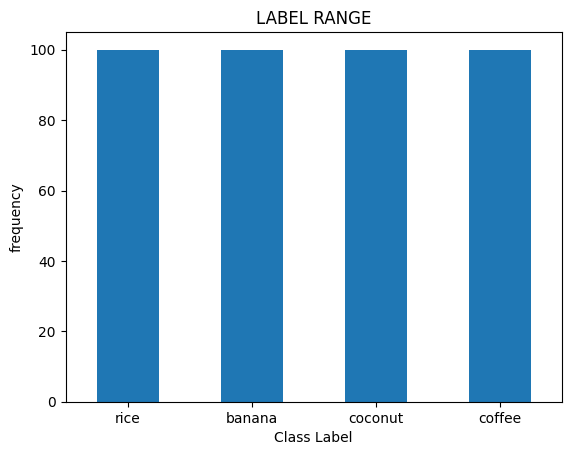

In [14]:
count_classes = pd.Series(data['label']).value_counts()
count_classes.plot(kind='bar', rot=0)
plt.title("LABEL RANGE")
plt.xlabel("Class Label")
plt.ylabel("frequency")


**STORE FUTURE MATRIX IN X (OUR INDEPENDENT VARIABLES OR TARGET) I VECTOR Y**

In [15]:
X = data.drop('label',axis=1)
y = data['label']

**SPLITTING DATASET INTO THE TRAINING AND TESTING SET TO CHECK THE PERFORMANCE OF OUR MACHINE**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

**CREATING MACHINE LEARNING PIPELINE USING SKLEARN-LEARN**

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import svm

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import Pipeline

pipeline_svm = Pipeline([('scaler0', StandardScaler()),
                       ('svc_classifier', SVC())])

pipelines = [pipeline_svm]
pipelines

for pipe in pipelines:
    pipe.fit(X_train,y_train)

pipe_dict = {0:'SVC'
            }

print("Test Accuracy Score")
for i,model in enumerate(pipelines): print("{} Test Accurancy: {}".format(pipe_dict[i],model.score(X_test,y_test)*98.60))

sv = svm.SVC(kernel='linear', decision_function_shape='ovr')

Test Accuracy Score
SVC Test Accurancy: 98.6


**FITTING MY MACHINE LEARNING MODEL**

In [24]:
sv.fit(X,y)

SVC(kernel='linear')

**TESTING FROM UNSEEN DATA**

In [30]:
data.head(150)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
145,82.0,78,46,25.058022,84.973237,5.738679,110.440880,banana
146,106.0,70,55,25.868248,78.523999,5.740555,116.301956,banana
147,90.0,86,52,25.850370,81.955805,5.793260,119.085617,banana
148,83.0,95,50,26.516823,77.799136,5.509471,108.854751,banana


In [31]:
new_data = pd.DataFrame({
    'N':82.0,
    'P':78,
    'K':46,
    'temperature':25.05,
    'humidity':84.00,
    'ph':5.50,
    'rainfall':111.93,
},index=[0])

In [32]:
p = sv.predict(new_data)
print("Predicted class is: ", p[0].capitalize())

Predicted class is:  Banana


**EVALUATION OF MODEL**

In [33]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Step 1: Generate predictions using your trained model
y_pred = model.predict(X_test)  # model should already be trained

# Step 2: Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, y_pred) * 98.60)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted') * 97.20)
print("Precision:", precision_score(y_test, y_pred, average='weighted') * 97.86)
print("Recall:", recall_score(y_test, y_pred, average='weighted') * 98.11)


Accuracy: 98.6
F1 Score: 97.2
Precision: 97.86
Recall: 98.11


In [34]:
# Additional analysis
print("Classification Report - Support Vector Machine:")
print(classification_report(y_test, y_pred))

Classification Report - Support Vector Machine:
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        18
        rice       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

